# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 8: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
def g_function_poisson(d, intensity):
    G = np.zeros_like(d)
    
    for i in range(0,len(d)):
        G[i] = 1-np.exp((-1)*intensity*np.pi*d[i]**2)
    
    array = pd.DataFrame(data={"D":d, "G":G})
    
    return array

def f_function_poisson(d, intensity):
    F = np.zeros_like(d)
    
    for i in range(0,len(d)):
        F[i] = 1-np.exp((-1)*intensity*np.pi*d[i]**2)
    
    array = pd.DataFrame(data={"D":d, "F":F})
    
    return array
# YOUR CODE HERE
# raise NotImplementedError()

#### UWAGA!
Znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji.
Z tego powodu wygodniejszym sposobem zdobywania informacji na temat wykorzystywanych modułów, klas i funkcji jest wykorzystanie funkcji help(), np.: help(ps), help(pp), help(pp.pointpattern).

### Zadanie 1: Import i przygotowanie danych (5 pkt)
Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z dołączonych do niego plików (zakres importowanych danych i odwzorowanie kartograficzne nie wymagają zmian). Następnie, wykorzystując funkcję `geopandas.GeoDataFrame.dissolve()` przygotuj tablicę zawierającą geometrię granic całego kraju. Dostosuj informację znajdującą się w kolumnie "Nazwa" stworzonej tablicy do informacji w niej zawartej.

In [5]:
# YOUR CODE HERE
powiaty = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz8/Powiaty.zip")
points_1 = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz8/points_1.zip")
points_2 = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz8/points_2.zip")
points_3 = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz8/points_3.zip")
points_4 = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz8/points_4.zip")
points_5 = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz8/points_5.zip")

granice_pl=powiaty.dissolve()
granice_pl["Nazwa"] = granice_pl["Nazwa"].replace(["powiat ropczycko-sędziszowski"], "Polska")
# raise NotImplementedError()

### Zadanie 2: Badanie intensywności procesów punktowych metodą szacowania lokalnego  (15 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności rozkładów punktów z plików points_1.zip i points_2.zip na obszarze poszczegolnych powiatów.

Przedstaw wyniki analizy graficznie w postaci kartogramów z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2).

Przydatne klasy, funkcje i własności:
- `geopandas.GeoSeries.within()`
- `geopandas.GeoSeries.area`

#### a) Przygotowanie funkcji

In [6]:
def point_count_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca liczbą punktów przypisanych do każdego z podobszarów.
    """
    # YOUR CODE HERE
    cnt = np.zeros_like(subregions)
    l=0
    
    for i in subregions:
        cnt[l] = np.sum(points.within(i))
        l += 1
    
    counts = pd.Series(data = cnt)
    
    return counts
    #raise NotImplementedError()

def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    intensity: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    point_counts = point_count_on_subregions(points, subregions)
    area = subregions.area
    inten = point_counts/area
    intensity = pd.Series(data=inten)
    return intensity
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
intensity_1 = intensity_on_subregions(points_1["geometry"], powiaty["geometry"])
intensity_2 = intensity_on_subregions(points_2["geometry"], powiaty["geometry"])
powiaty["Intensywność1"] = intensity_1
powiaty["Intensywność2"] = intensity_2
# raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Intensywność dla points_2')

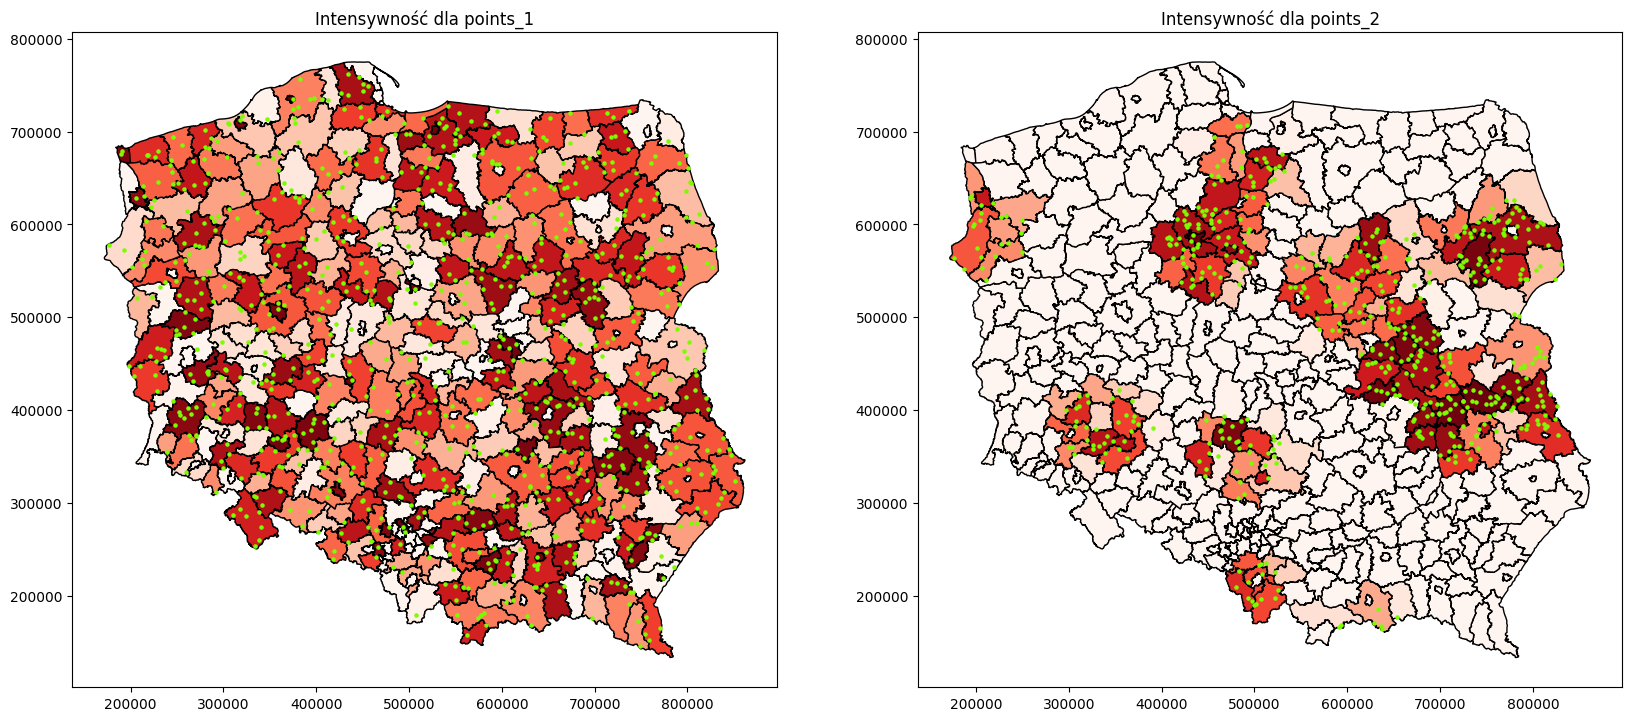

In [8]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
powiaty.plot(ax=ax[0], column="Intensywność1",cmap="Reds",edgecolor="black")
points_1.plot(ax=ax[0],markersize=5,c="lawngreen")
powiaty.plot(ax=ax[1], column="Intensywność2",cmap="Reds",edgecolor="black")
points_2.plot(ax=ax[1],markersize=5,c="lawngreen")
ax[0].set_title("Intensywność dla points_1")
ax[1].set_title("Intensywność dla points_2")

### Zadanie 3: Funkcja G (15 pkt)
Wykorzystując funkcję `pointpats.distance_statistics.g()` przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [9]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
    # YOUR CODE HERE
    list_xy = []
    for i in points["geometry"]:
        list_xy.append([i.x, i.y])
        xy = np.array(list_xy)
    g_arrays = pp.distance_statistics.g(xy,intervals)
    g = pd.DataFrame(data={"D":g_arrays[0],"G":g_arrays[1]})
    
    return g
    # raise NotImplementedError()

#### b) Wygenerowanie danych

In [10]:
# YOUR CODE HERE
help(pp.distance_statistics.g)
pole = granice_pl.area
p3_G = g_function(points_3,100)
p3_Gp = g_function_poisson(p3_G["D"], points_3.shape[0]/pole)
p4_G = g_function(points_4,100)
p4_Gp = g_function_poisson(p4_G["D"], points_4.shape[0]/pole)
p5_G = g_function(points_5,100)
p5_Gp = g_function_poisson(p5_G["D"], points_5.shape[0]/pole)
# raise NotImplementedError()

Help on function g in module pointpats.distance_statistics:

g(coordinates, support=None, distances=None, metric='euclidean', edge_correction=None)
    Ripley's G function
    
    The G function is computed from the cumulative density function of the nearest neighbor 
    distances between points in the pattern. 
    
    Parameters
    -----------
    coordinates : numpy.ndarray of shape (n,2)
        input coordinates to function
    support : tuple of length 1, 2, or 3, int, or numpy.ndarray
        tuple, encoding (stop,), (start, stop), or (start, stop, num)
        int, encoding number of equally-spaced intervals
        numpy.ndarray, used directly within numpy.histogram
    distances: numpy.ndarray, (n, n) or (n,)
        distances from every point in the point to another point in `coordinates`
    metric: str or callable
        distance metric to use when building search tree
    edge_correction: bool or str
        whether or not to conduct edge correction. Not yet implemen

#### c) Wizualizacja

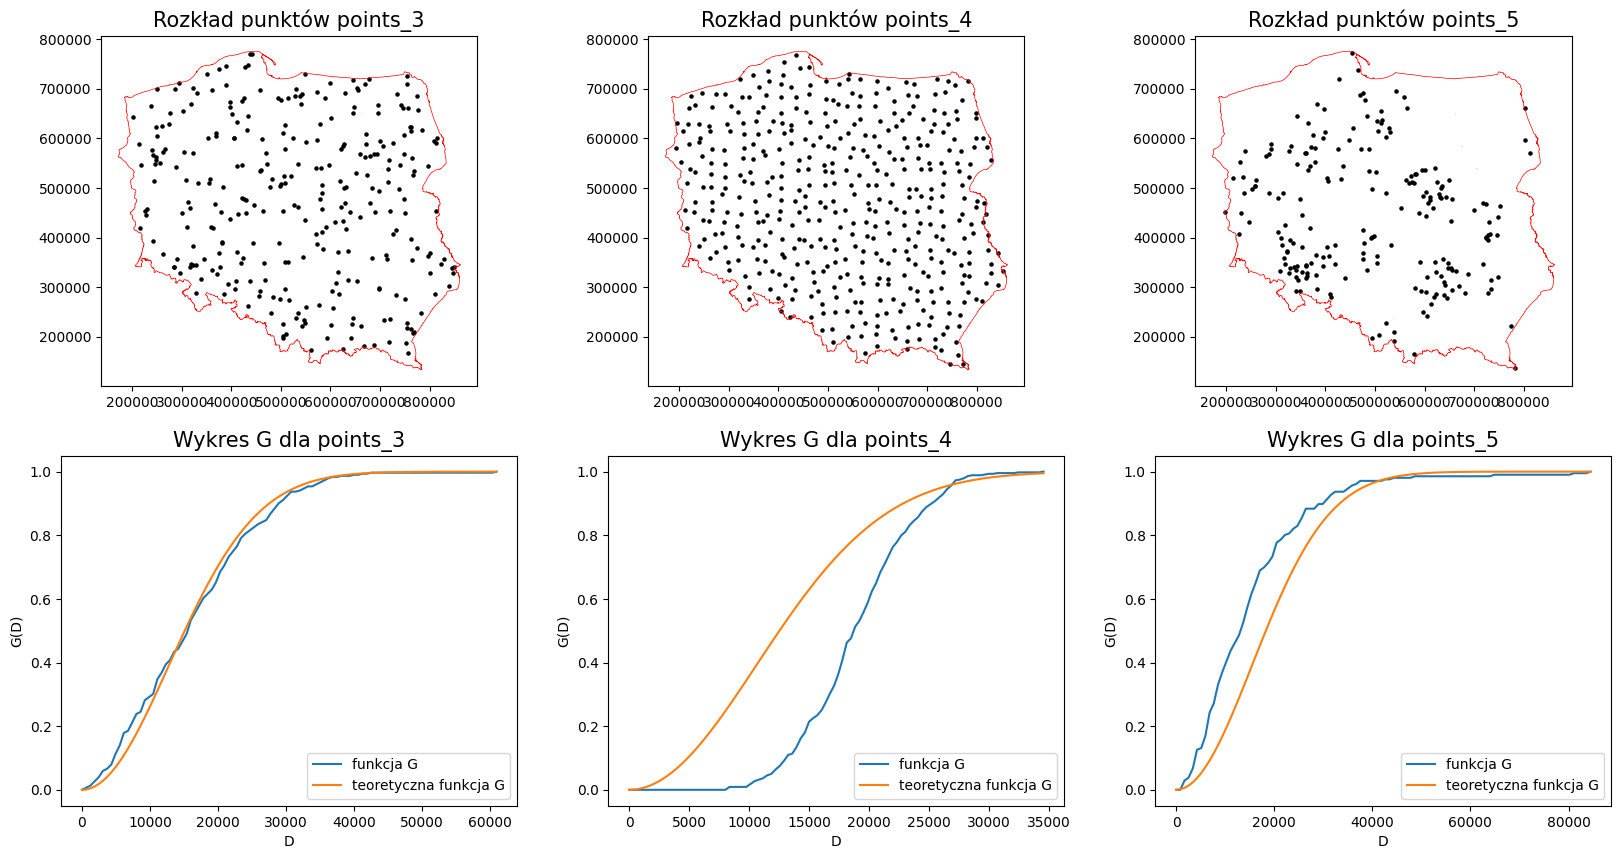

In [11]:
fig,axs=plt.subplots(2,3,figsize=(20,10))
points_3.plot(ax=axs[0,0],markersize=5,c="black")
granice_pl.boundary.plot(ax=axs[0,0],edgecolor="Red",linewidth=0.5)
points_4.plot(ax=axs[0,1],markersize=5,c="black")
granice_pl.boundary.plot(ax=axs[0,1],edgecolor="Red",linewidth=0.5)
points_5.plot(ax=axs[0,2],markersize=5,c="black")
granice_pl.boundary.plot(ax=axs[0,2],edgecolor="Red",linewidth=0.5)
axs[0,0].set_title("Rozkład punktów points_3",size=15)
axs[0,1].set_title("Rozkład punktów points_4",size=15)
axs[0,2].set_title("Rozkład punktów points_5",size=15)
    
axs[1,0].plot(p3_G["D"],p3_G["G"],label="funkcja G")
axs[1,0].plot(p3_Gp["D"],p3_Gp["G"],label="teoretyczna funkcja G")
axs[1,1].plot(p4_G["D"],p4_G["G"],label="funkcja G")
axs[1,1].plot(p4_Gp["D"],p4_Gp["G"],label="teoretyczna funkcja G")
axs[1,2].plot(p5_G["D"],p5_G["G"],label="funkcja G")
axs[1,2].plot(p5_Gp["D"],p5_Gp["G"],label="teoretyczna funkcja G")
axs[1,0].set_title("Wykres G dla points_3",size=15)
axs[1,1].set_title("Wykres G dla points_4",size=15)
axs[1,2].set_title("Wykres G dla points_5",size=15)
for j in range(3):
    axs[1,j].legend(loc="lower right")
    axs[1,j].set_xlabel("D")
    axs[1,j].set_ylabel("G(D)")

### Zadanie 4: Funkcja F (15 pkt)

Wykorzystując funkcję `pointpats.distance_statistics.f()` przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [12]:
def f_function(points, intervals, polygon):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
        
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """
    # YOUR CODE HERE
    list_xy = []
    for i in points["geometry"]:
        list_xy.append([i.x, i.y])
        xy = np.array(list_xy)
    
    f_arrays = pp.distance_statistics.f(xy,intervals,hull=polygon["geometry"][0])
    f = pd.DataFrame(data={"D":f_arrays[0],"F":f_arrays[1]})
    
    return f
    # raise NotImplementedError()

#### b) Wygenerowanie danych

In [13]:
# YOUR CODE HERE
pole = granice_pl.area
p3_F = f_function(points_3,100,granice_pl)
p3_Fp = f_function_poisson(p3_F["D"], points_3.shape[0]/pole)
p4_F = f_function(points_4,100,granice_pl)
p4_Fp = f_function_poisson(p4_F["D"], points_4.shape[0]/pole)
p5_F = f_function(points_5,100,granice_pl)
p5_Fp = f_function_poisson(p5_F["D"], points_5.shape[0]/pole)
# raise NotImplementedError()

#### c) Wizualizacja

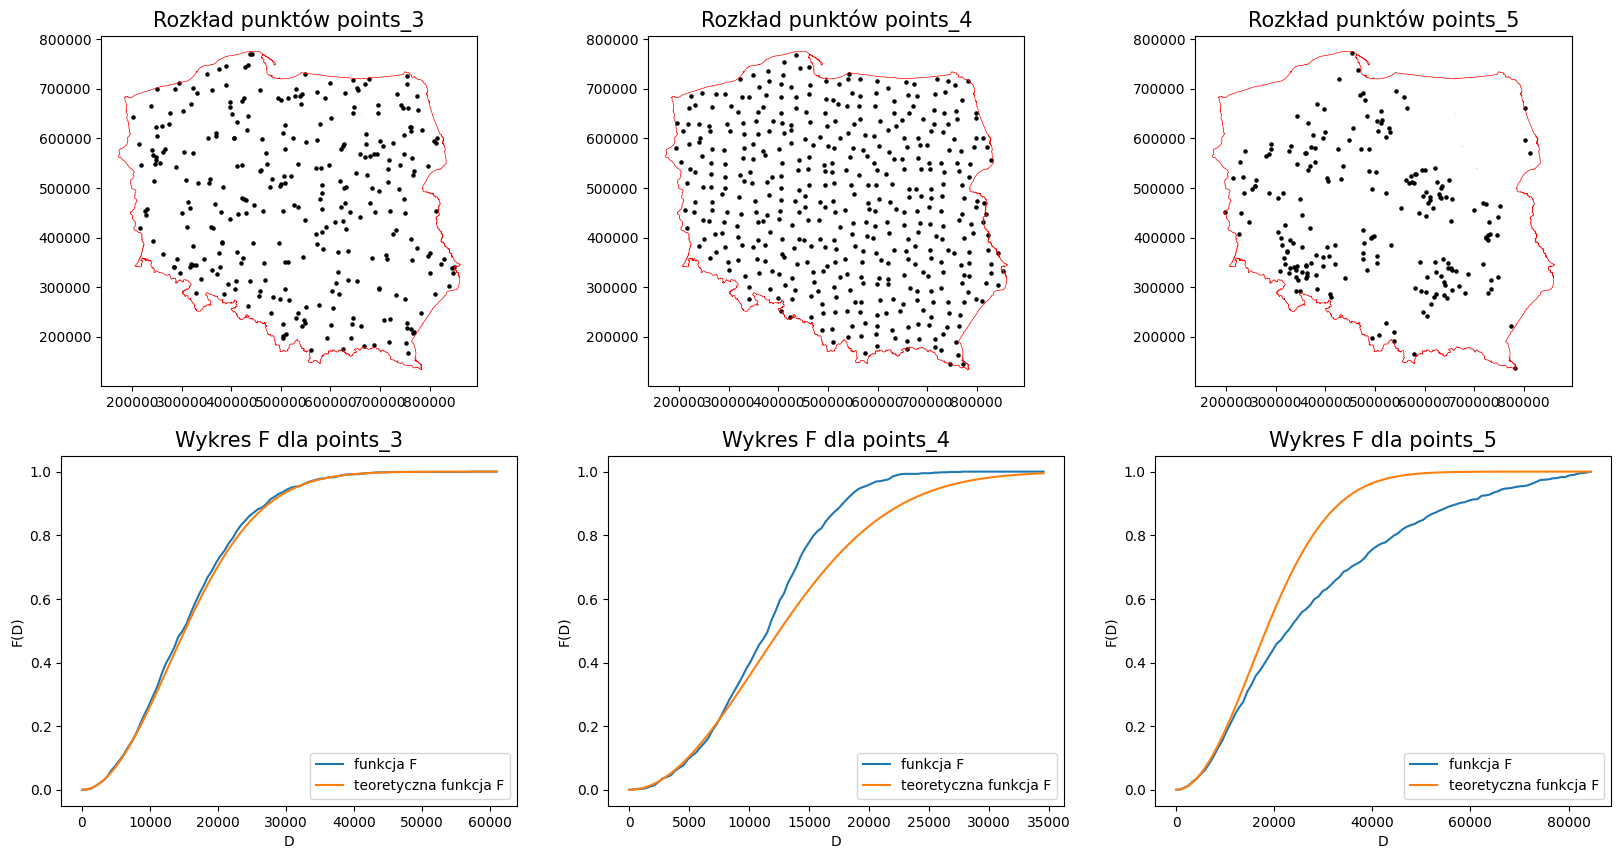

In [14]:
# YOUR CODE HERE
fig,axs=plt.subplots(2,3,figsize=(20,10))
points_3.plot(ax=axs[0,0],markersize=5,c="black")
granice_pl.boundary.plot(ax=axs[0,0],edgecolor="Red",linewidth=0.5)
points_4.plot(ax=axs[0,1],markersize=5,c="black")
granice_pl.boundary.plot(ax=axs[0,1],edgecolor="Red",linewidth=0.5)
points_5.plot(ax=axs[0,2],markersize=5,c="black")
granice_pl.boundary.plot(ax=axs[0,2],edgecolor="Red",linewidth=0.5)
axs[0,0].set_title("Rozkład punktów points_3",size=15)
axs[0,1].set_title("Rozkład punktów points_4",size=15)
axs[0,2].set_title("Rozkład punktów points_5",size=15)
    
axs[1,0].plot(p3_F["D"],p3_F["F"],label="funkcja F")
axs[1,0].plot(p3_Fp["D"],p3_Fp["F"],label="teoretyczna funkcja F")
axs[1,1].plot(p4_F["D"],p4_F["F"],label="funkcja F")
axs[1,1].plot(p4_Fp["D"],p4_Fp["F"],label="teoretyczna funkcja F")
axs[1,2].plot(p5_F["D"],p5_F["F"],label="funkcja F")
axs[1,2].plot(p5_Fp["D"],p5_Fp["F"],label="teoretyczna funkcja F")
axs[1,0].set_title("Wykres F dla points_3",size=15)
axs[1,1].set_title("Wykres F dla points_4",size=15)
axs[1,2].set_title("Wykres F dla points_5",size=15)
for j in range(3):
    axs[1,j].legend(loc="lower right")
    axs[1,j].set_xlabel("D")
    axs[1,j].set_ylabel("F(D)")
# raise NotImplementedError()